In [6]:
import os
import numpy as np 

In [10]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime

def find_nearest_file(folder_path, target_date):
    # This will attempt to find the file closest to the first of the month
    files = glob.glob(os.path.join(folder_path, f'*_{target_date.strftime("%Y-%m")}-*.npy'))
    if not files:
        return None
    # Find the file with the closest date
    closest_file = min(files, key=lambda x: abs(datetime.strptime(x[-14:-4], '%Y-%m-%d') - target_date))
    return closest_file

def calculate_features_from_array(file_path):
    if file_path and os.path.exists(file_path):
        data_array = np.load(file_path)
        return {
            'mean': np.mean(data_array),
            'max': np.max(data_array),
            'min': np.min(data_array),
            'std_dev': np.std(data_array)
        }
    return {'mean': None, 'max': None, 'min': None, 'std_dev': None}

# Load climate data
climate_data_path = r'C:\Users\Musae\Documents\GitHub-REPOs\Senior-project_Doc\monthly_averages_formatted.csv'
climate_data = pd.read_csv(climate_data_path)
climate_data['Date'] = pd.to_datetime(climate_data['Year/Month'], format='%Y/%m')
climate_data.drop('Year/Month', axis=1, inplace=True)

# Paths for NDVI and NDMI data
ndvi_folder_path = r'C:\Users\Musae\Documents\GitHub-REPOs\Senior-project_Doc\Docs\Array\NDVI-Array'
ndmi_folder_path = r'C:\Users\Musae\Documents\GitHub-REPOs\Senior-project_Doc\Docs\Array\NDMI-Array'

# Prepare the dataset
ml_data = []
for index, row in climate_data.iterrows():
    date = row['Date']
    temp = row['Temp Average']
    precip = row['PRECTOTCORR Average']

    # Find nearest file for NDVI and NDMI
    ndvi_file_path = find_nearest_file(ndvi_folder_path, date)
    ndmi_file_path = find_nearest_file(ndmi_folder_path, date)

    # Calculate features from NDVI and NDMI arrays
    ndvi_stats = calculate_features_from_array(ndvi_file_path)
    ndmi_stats = calculate_features_from_array(ndmi_file_path)

    # Append data including NDVI and NDMI stats
    ml_data.append({
        'Year': date.year,
        'Month': date.month,
        'Temp Average': temp,
        'Precipitation Average': precip,
        'NDVI Mean': ndvi_stats['mean'],
        'NDVI Max': ndvi_stats['max'],
        'NDVI Min': ndvi_stats['min'],
        'NDVI Std Dev': ndvi_stats['std_dev'],
        'NDMI Mean': ndmi_stats['mean'],
        'NDMI Max': ndmi_stats['max'],
        'NDMI Min': ndmi_stats['min'],
        'NDMI Std Dev': ndmi_stats['std_dev']
    })

# Convert list to DataFrame
ml_ready_dataset = pd.DataFrame(ml_data)
print(ml_ready_dataset.head())


   Year  Month  Temp Average  Precipitation Average  NDVI Mean  NDVI Max  \
0  2018     12     17.548548               0.490000   0.076769  0.834200   
1  2019      1     17.317742               0.000000   0.073419  0.808803   
2  2019      2     17.146786               0.146429   0.086812  0.918729   
3  2019      3     19.488065               0.001290   0.073872  0.769633   
4  2019      4     25.557667               0.146000   0.064857  0.751705   

   NDVI Min  NDVI Std Dev  NDMI Mean  NDMI Max  NDMI Min  NDMI Std Dev  
0 -0.380076      0.060417  -0.091396  0.546207 -0.658296      0.058031  
1 -0.448261      0.056494  -0.100173  0.613990 -0.609230      0.056208  
2 -0.860155      0.060283  -0.089514  0.761360 -0.894168      0.058510  
3 -0.308622      0.047911  -0.093159  0.535137 -0.498276      0.049038  
4 -0.371170      0.046369  -0.104712  0.447143 -0.557021      0.048382  


In [11]:
ml_ready_dataset

,Year,Month,Temp Average,Precipitation Average,NDVI Mean,NDVI Max,NDVI Min,NDVI Std Dev,NDMI Mean,NDMI Max,NDMI Min,NDMI Std Dev
0,2018,12,17.548548,0.490000,0.076769,0.834200,-0.380076,0.060417,-0.091396,0.546207,-0.658296,0.058031
1,2019,1,17.317742,0.000000,0.073419,0.808803,-0.448261,0.056494,-0.100173,0.613990,-0.609230,0.056208
2,2019,2,17.146786,0.146429,0.086812,0.918729,-0.860155,0.060283,-0.089514,0.761360,-0.894168,0.058510
3,2019,3,19.488065,0.001290,0.073872,0.769633,-0.308622,0.047911,-0.093159,0.535137,-0.498276,0.049038
4,2019,4,25.557667,0.146000,0.064857,0.751705,-0.371170,0.046369,-0.104712,0.447143,-0.557021,0.048382
5,2019,5,31.810161,0.052258,0.072393,0.754812,-0.355733,0.048862,-0.103996,0.464203,-0.597543,0.046461
6,2019,6,36.131500,0.000000,0.070519,0.768371,-0.429397,0.046990,-0.104959,0.506388,-0.614979,0.045979
7,2019,7,36.226129,0.000000,0.068843,0.791445,-0.408228,0.048649,-0.103841,0.455146,-0.635541,0.047805
8,2019,8,35.981613,0.000000,0.066943,0.760916,-0.313308,0.046110,-0.112457,0.500610,-0.614346,0.048327
9,2019,9,34.066667,0.000000,0.064117,0.762025,-0.363234,0.050332,-0.112215,0.556725,-0.623865,0.051823


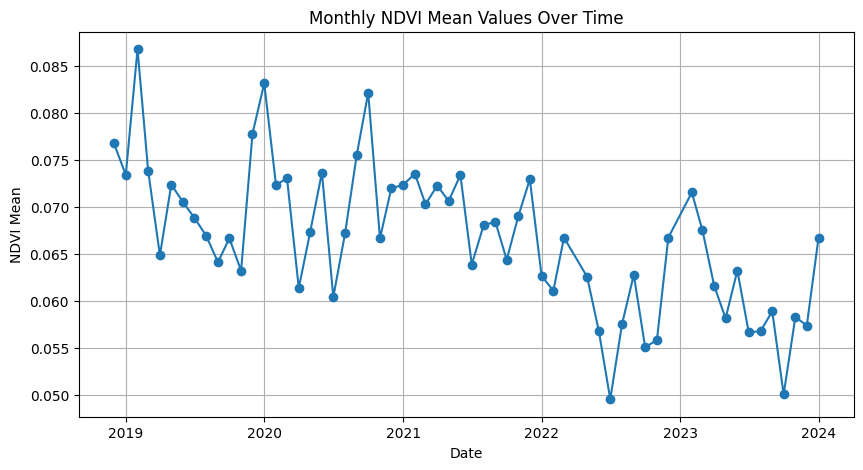

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ml_ready_dataset is your main DataFrame
# Check if 'Date' column needs to be created
if 'Date' not in ml_ready_dataset.columns:
    # Assuming 'Year' and 'Month' columns exist and are integers
    ml_ready_dataset['Date'] = pd.to_datetime(ml_ready_dataset[['Year', 'Month']].assign(DAY=1))

# Fill missing values with the mean of each column
ml_ready_dataset.fillna(ml_ready_dataset.mean(), inplace=True)

# Ensure 'Date' column is sorted if plotting time series data
ml_ready_dataset.sort_values('Date', inplace=True)

# Plotting NDVI Mean over time
plt.figure(figsize=(10, 5))
plt.plot(ml_ready_dataset['Date'], ml_ready_dataset['NDVI Mean'], marker='o', linestyle='-')
plt.title('Monthly NDVI Mean Values Over Time')
plt.xlabel('Date')
plt.ylabel('NDVI Mean')
plt.grid(True)
plt.show()


Mean Squared Error: 1.7507411819923615e-05
R^2 Score: 0.7968600934589022


C:\Users\Musae\AppData\Local\Temp\ipykernel_364\3049275526.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


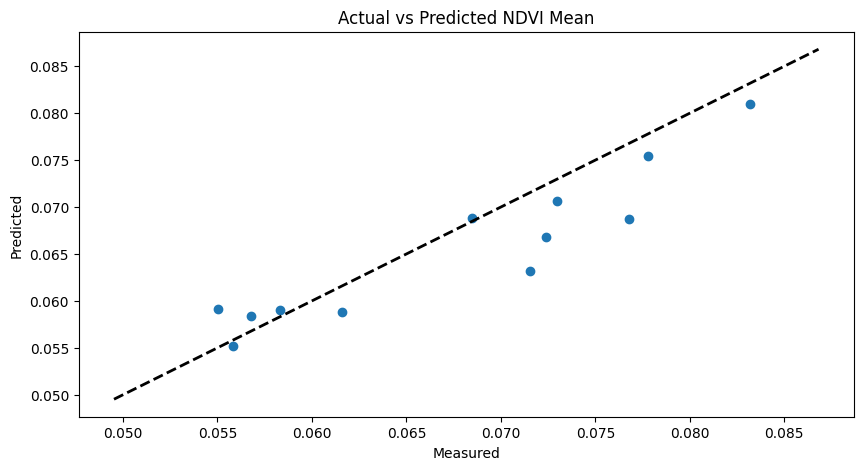

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = ml_ready_dataset

# Assuming you want to predict 'NDVI Mean'
X = df[['Temp Average', 'Precipitation Average', 'NDVI Max', 'NDVI Min', 'NDVI Std Dev', 'NDMI Mean', 'NDMI Max', 'NDMI Min', 'NDMI Std Dev']]
y = df['NDVI Mean']

# Fill any remaining missing values just in case
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted NDVI Mean')
plt.show()


Mean Squared Error: 1.7507411819923615e-05
R^2 Score: 0.7968600934589022


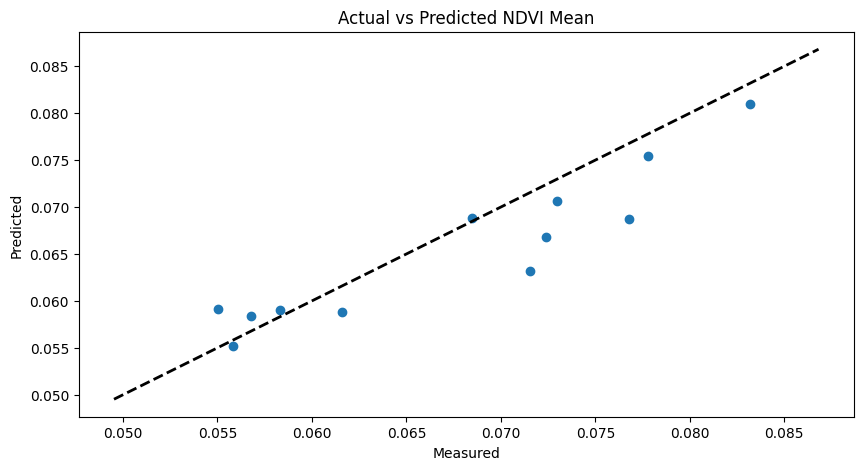

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = ml_ready_dataset

# Impute missing values
df.fillna(df.mean(), inplace=True)

# Prepare features and target variable
X = df[['Temp Average', 'Precipitation Average', 'NDVI Max', 'NDVI Min', 'NDVI Std Dev', 'NDMI Mean', 'NDMI Max', 'NDMI Min', 'NDMI Std Dev']]
y = df['NDVI Mean']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted NDVI Mean')
plt.show()


In [16]:
from sklearn.model_selection import cross_val_score

# Define the model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validated scores
print("CV R^2 scores:", cv_scores)
print("Average CV R^2 score:", cv_scores.mean())


CV R^2 scores: [ 0.55278787  0.52494023 -1.71265323 -0.51088328  0.0589223 ]
Average CV R^2 score: -0.21737722258508746


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Prepare the pipeline
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Print the cross-validated scores
print("CV R^2 scores:", cv_scores)
print("Average CV R^2 score:", cv_scores.mean())


CV R^2 scores: [ 0.55071123  0.51681399 -1.79443137 -0.40852405  0.04661246]
Average CV R^2 score: -0.21776354825264033
